# Rocks Neural Network vs Man Classification



In [ ]:
# Basic dataframe and array manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.manifold import MDS
from sklearn.manifold import LocallyLinearEmbedding
from scipy.spatial import procrustes

# Model performance
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import silhouette_score

# To deal with unnecesary warning Warnings
import warnings
warnings.simplefilter("ignore")

# Reading images
from PIL import Image
import os

# Clustering
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

# Neural network (Keras and Tensorflow)
import keras
import tensorflow
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras import layers

# Time
import time

In [ ]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

def plot_decision_boundaries_without_points(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

In [ ]:
def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

## Reading data

Reading the 360 pics

In [ ]:
path = '/content/360 Rocks'
images_dir = os.listdir(path)

rocks_360 = []
for image_name in images_dir:
    image_path = os.path.join(path, image_name)
    new_size = (400, 400)
    if os.path.isfile(image_path):
        with Image.open(image_path) as img:
            rocks_360.append(rgb2gray(np.array(img.resize(new_size))).flatten())
    else:
        print(f"File not found: {image_path}")

Reading the 120 pics

In [ ]:
path2 = '/content/120 Rocks'
images_dir2 = os.listdir(path2)

rocks_120 = []
for image_name in images_dir2:
    image_path = os.path.join(path2, image_name)
    new_size = (400, 400)
    if os.path.isfile(image_path):
        with Image.open(image_path) as img:
            rocks_120.append(rgb2gray(np.array(img.resize(new_size))).flatten())
    else:
        print(f"File not found: {image_path}")

In [ ]:
rocks_360[0].shape

(160000,)

In [ ]:
rocks_120[0].shape

(160000,)

Reading MDS text file

In [ ]:
mds_360 = []
with open('mds_360.txt', 'r') as f:
  for line in f:
    mds_360.append(np.array([float(x) for x in line.split()]))

In [ ]:
mds_120 = []
with open('mds_120.txt', 'r') as f:
  for line in f:
    mds_120.append(np.array([float(x) for x in line.split()]))

In [ ]:
X = np.array(rocks_360)
pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [ ]:
d

220

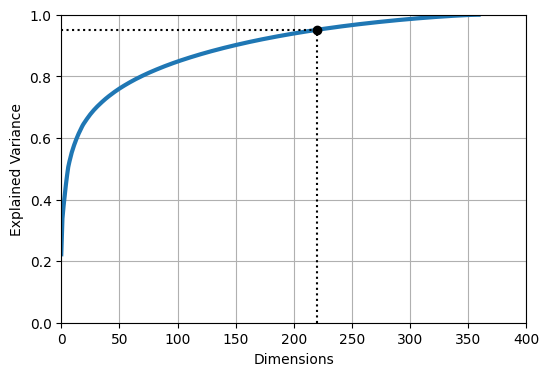

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.grid(True)
plt.show()

In [ ]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)
pca.n_components_

220

In [ ]:
np.sum(pca.explained_variance_ratio_)

0.9504859835429749

*   **220** components are needed to preserve 95% of the variance.


In [ ]:
pca = PCA(n_components=220)
X_reduced = pca.fit_transform(X)
X_recovered = pca.inverse_transform(X_reduced)

Text(0.5, 1.0, 'Compressed')

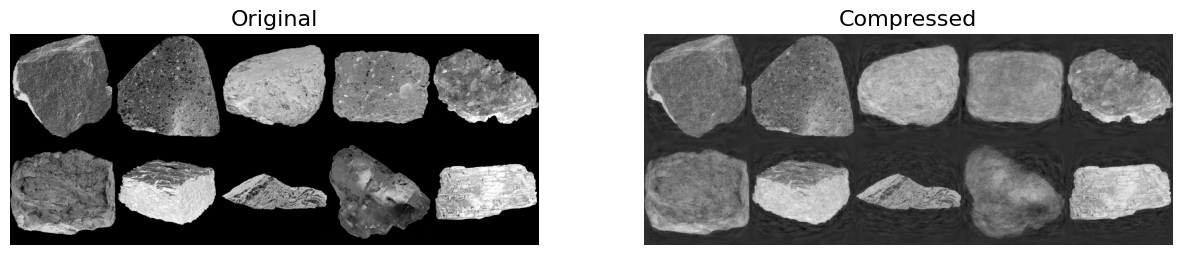

In [ ]:
def plot_rocks(instances, images_per_row=5, **options):
    size = 400
    images_per_row = min(len(instances), images_per_row)
    n_rows = (len(instances) - 1) // images_per_row + 1

    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

# plot random 10 rocks
random_indices = np.random.choice(len(X), 10, replace=False)
plt.figure(figsize=(15, 10))
plt.subplot(121)
plot_rocks(X[random_indices])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_rocks(X_recovered[random_indices])
plt.title("Compressed", fontsize=16)


In [ ]:
# labels/categories
y = np.array([i[0] for i in images_dir])

In [ ]:
pca = PCA(n_components=2)
X_reduced_pca = pca.fit_transform(X)

In [ ]:
pca.explained_variance_ratio_

array([0.22226362, 0.11604547])

*   The first component explains 22.22% of the variance, and the second one explains 11.60% of the variance.

#### **PCA**

In [ ]:
y

array(['M', 'S', 'I', 'M', 'S', 'S', 'M', 'I', 'I', 'S', 'I', 'I', 'I',
       'M', 'S', 'I', 'S', 'I', 'I', 'M', 'S', 'I', 'S', 'S', 'S', 'S',
       'I', 'S', 'S', 'M', 'M', 'M', 'M', 'M', 'S', 'I', 'S', 'I', 'S',
       'S', 'S', 'I', 'M', 'I', 'M', 'M', 'M', 'I', 'I', 'S', 'I', 'I',
       'S', 'I', 'M', 'S', 'S', 'I', 'S', 'I', 'M', 'I', 'S', 'S', 'S',
       'I', 'M', 'M', 'M', 'I', 'M', 'I', 'S', 'I', 'I', 'S', 'S', 'S',
       'M', 'M', 'M', 'M', 'I', 'M', 'S', 'M', 'I', 'S', 'S', 'M', 'M',
       'M', 'I', 'S', 'S', 'M', 'M', 'M', 'S', 'S', 'S', 'M', 'I', 'S',
       'M', 'M', 'I', 'I', 'M', 'M', 'M', 'S', 'S', 'S', 'I', 'I', 'S',
       'S', 'S', 'S', 'M', 'I', 'I', 'I', 'M', 'I', 'I', 'S', 'M', 'I',
       'S', 'M', 'S', 'S', 'I', 'I', 'M', 'I', 'M', 'I', 'I', 'M', 'I',
       'S', 'I', 'M', 'I', 'M', 'M', 'M', 'S', 'I', 'I', 'I', 'M', 'S',
       'I', 'S', 'M', 'I', 'M', 'I', 'M', 'S', 'M', 'S', 'S', 'S', 'I',
       'I', 'S', 'S', 'I', 'M', 'I', 'M', 'M', 'M', 'M', 'I', 'I

In [ ]:
categories = np.unique(y)
colors = ['#D53838', '#67BB60', '#3887D5']
rock_images = [rock.reshape(400, 400) for rock in rocks_360[:50]]

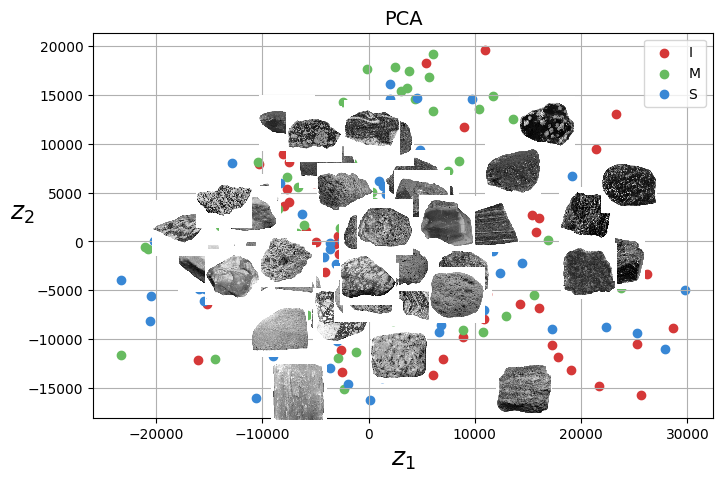

In [ ]:
plt.figure(figsize=(8,5))

plt.title("PCA", fontsize=14)

for category, color in zip(categories, colors):
    indices = y == category
    plt.scatter(X_reduced_pca[indices, 0], X_reduced_pca[indices, 1], c=color, label=category)

# rock images
for i, (img, xy) in enumerate(zip(rock_images, X_reduced_pca[:50])):
    imagebox = OffsetImage(img, cmap=plt.get_cmap('gray'), zoom=0.1)
    ab = AnnotationBbox(imagebox, xy, frameon=False)
    plt.gca().add_artist(ab)

plt.legend()

plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.show()


#### **t-SNE**

In [ ]:
tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(X)

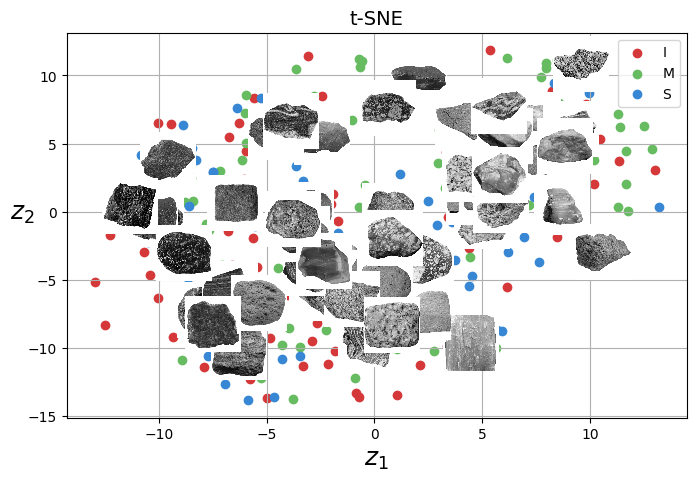

In [ ]:
plt.figure(figsize=(8,5))

plt.title("t-SNE", fontsize=14)

for category, color in zip(categories, colors):
    indices = y == category
    plt.scatter(X_reduced_tsne[indices, 0], X_reduced_tsne[indices, 1], c=color, label=category)

# rock images
for i, (img, xy) in enumerate(zip(rock_images, X_reduced_tsne[:50])):
    imagebox = OffsetImage(img, cmap=plt.get_cmap('gray'), zoom=0.1)
    ab = AnnotationBbox(imagebox, xy, frameon=False)
    plt.gca().add_artist(ab)

plt.legend()

plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.show()


#### **LLE**

In [ ]:
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_reduced_lle = lle.fit_transform(X)

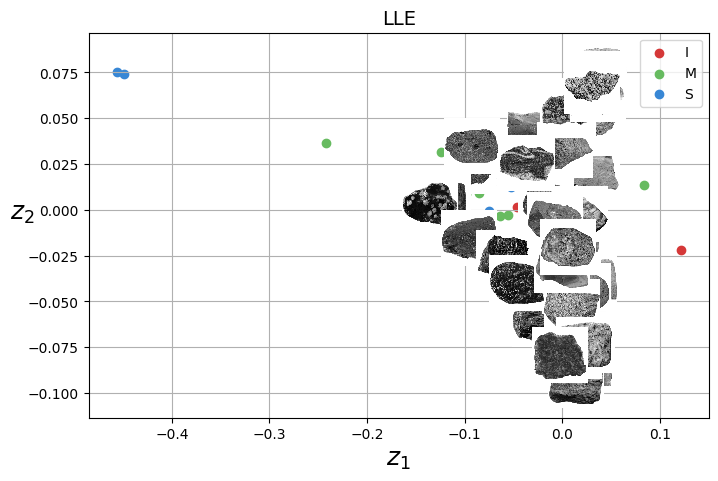

In [ ]:
plt.figure(figsize=(8,5))

plt.title("LLE", fontsize=14)

for category, color in zip(categories, colors):
    indices = y == category
    plt.scatter(X_reduced_lle[indices, 0], X_reduced_lle[indices, 1], c=color, label=category)

# rock images
for i, (img, xy) in enumerate(zip(rock_images, X_reduced_lle[:50])):
    imagebox = OffsetImage(img, cmap=plt.get_cmap('gray'), zoom=0.1)
    ab = AnnotationBbox(imagebox, xy, frameon=False)
    plt.gca().add_artist(ab)

plt.legend()

plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.show()


#### **MDS**

In [ ]:
mds = MDS(n_components=2, random_state=42)
X_reduced_mds = mds.fit_transform(X)

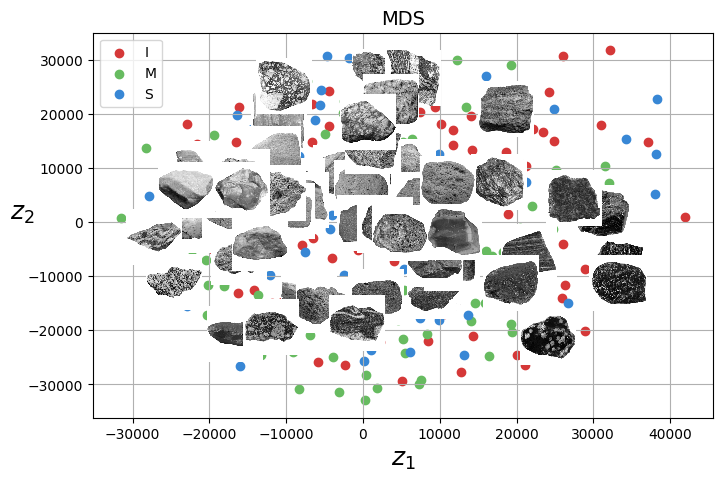

In [ ]:
plt.figure(figsize=(8,5))

plt.title("MDS", fontsize=14)

for category, color in zip(categories, colors):
    indices = y == category
    plt.scatter(X_reduced_mds[indices, 0], X_reduced_mds[indices, 1], c=color, label=category)

# rock images
for i, (img, xy) in enumerate(zip(rock_images, X_reduced_mds[:50])):
    imagebox = OffsetImage(img, cmap=plt.get_cmap('gray'), zoom=0.1)
    ab = AnnotationBbox(imagebox, xy, frameon=False)
    plt.gca().add_artist(ab)

plt.legend()

plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.show()

*   By the looks of it, MDS seems to capture the most diverse set of distinct visual properties of the rocks (shapes, textures...). It also clusters rocks of similar features together (e.g., smaller rocks in the very top, more contrasted rocks in the far left...). This shows that it preserves intrinsic similarities present in the original images. For those reasons, MDS is elected to be the best reduction technique. t-SNE would be a close second.


### Dimensionality reduction

In [ ]:
# PCA
pca = PCA(n_components=8)
X_reduced_pca = pca.fit_transform(X)

In [ ]:
# t-SNE
tsne = TSNE(n_components=8, method="exact", random_state=42)
X_reduced_tsne = tsne.fit_transform(X)

In [ ]:
# LLE
lle = LocallyLinearEmbedding(n_components=8, random_state=42)
X_reduced_lle = lle.fit_transform(X)

In [ ]:
# MDS
mds = MDS(n_components=8, random_state=42)
X_reduced_mds = mds.fit_transform(X)

### Image embeddings comparison

In [ ]:
# Procrustes analysis
mtx1_pca, mtx2_pca, disparity_pca = procrustes(mds_360, X_reduced_pca)
mtx1_tsne, mtx2_tsne, disparity_tsne = procrustes(mds_360, X_reduced_tsne)
mtx1_mds, mtx2_mds, disparity_mds = procrustes(mds_360, X_reduced_mds)
mtx1_lle, mtx2_lle, disparity_lle = procrustes(mds_360, X_reduced_lle)

In [ ]:
mtx1_pca.shape

(360, 8)

**PCA's Disparity**

In [ ]:
disparity_pca

0.9885646106081581

**t-SNE's Disparity**

In [ ]:
disparity_tsne

0.9885457039340022

**MDS' Disparity**

In [ ]:
disparity_mds

0.9862624101020492

**LLE's Disparity**

In [ ]:
disparity_lle

0.9833378571604627

*   LLE has the lowest disparity value which suggests that it aligns best with human perception of the images.

In [ ]:
def compute_correlation_coefficient(mtx1, mtx2):
    correlations = []
    for i in range(mtx1.shape[1]):
        correlation = np.corrcoef(mtx1[:, i], mtx2[:, i])[0, 1]
        correlations.append(correlation)
    return correlations

correlations_pca = compute_correlation_coefficient(mtx1_pca, mtx2_pca)
correlations_tsne = compute_correlation_coefficient(mtx1_tsne, mtx2_tsne)
correlations_mds = compute_correlation_coefficient(mtx1_mds, mtx2_mds)
correlations_lle = compute_correlation_coefficient(mtx1_lle, mtx2_lle)

correlation_data = {
    'PCA': correlations_pca,
    't-SNE': correlations_tsne,
    'MDS': correlations_mds,
    'LLE': correlations_lle,
}

correlation_table = pd.DataFrame(correlation_data)

In [ ]:
# from 0 to 7, are the features
correlation_table

,PCA,t-SNE,MDS,LLE
0,0.138593,0.139913,0.157907,0.199638
1,0.100215,0.111810,0.113513,0.089464
2,0.091529,0.092461,0.133632,0.125678
3,0.077299,0.067686,0.085254,0.127353
4,0.113637,0.086768,0.098586,0.134466
5,0.157662,0.130055,0.160489,0.160451
6,0.045659,0.073946,0.074461,0.041362
7,0.094340,0.131025,0.089707,0.135900


In [ ]:
pca = PCA(n_components=2)
X2D = pca.fit_transform(rocks_360)
np.sum(pca.explained_variance_ratio_)

0.338309087369808

Choosing the best number of clusters with silhouette scores

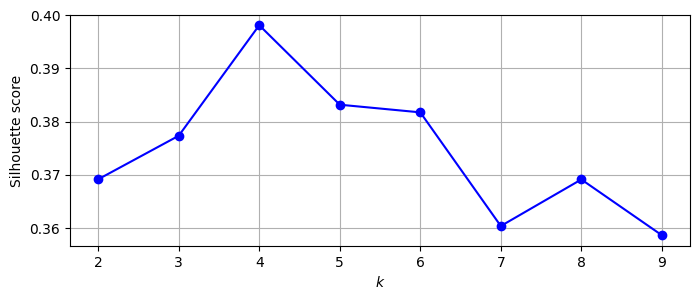

In [ ]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X2D)
                for k in range(1, 10)]
silhouette_scores = [silhouette_score(X2D, model.labels_)
                     for model in kmeans_per_k[1:]]
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.grid()
plt.show()

*  **4** seems to be the ideal number of clusters.

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
y_pred = kmeans.fit_predict(X2D)
kmeans.cluster_centers_

array([[ 16041.30343301,  -3823.43029504],
       [-12168.88789392,    127.88473654],
       [  -555.70693067,  -6780.23349115],
       [  2955.97165225,   8924.29676823]])

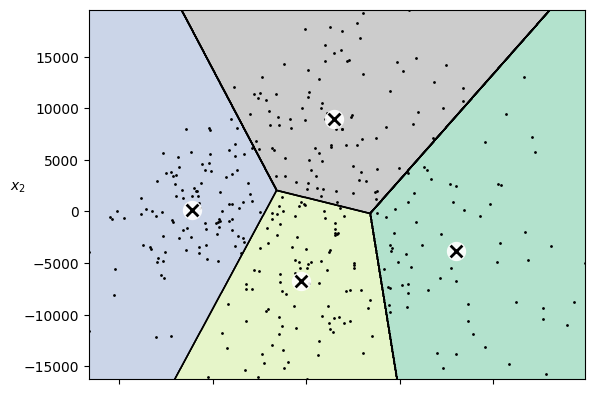

In [ ]:
plot_decision_boundaries(kmeans, X2D, show_centroids=True,
                         show_xlabels=False)

In [ ]:
# labels/categories
y = np.array([i[0] for i in images_dir])

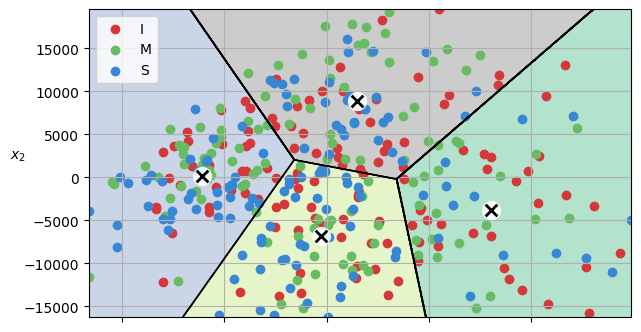

In [ ]:
categories = np.unique(y)
colors = ['#D53838', '#67BB60', '#3887D5']

plt.figure(figsize=(7,4))
plot_decision_boundaries_without_points(kmeans, X2D, show_centroids=True,
                         show_xlabels=False)

for category, color in zip(categories, colors):
    indices = y == category
    plt.scatter(X2D[indices, 0], X2D[indices, 1], c=color, label=category)

plt.legend()
plt.grid(True)
plt.show()

So we can see that our clusterisation with only 2 principal components does not really make sense in this specific task

Let's choose the model using information criterions

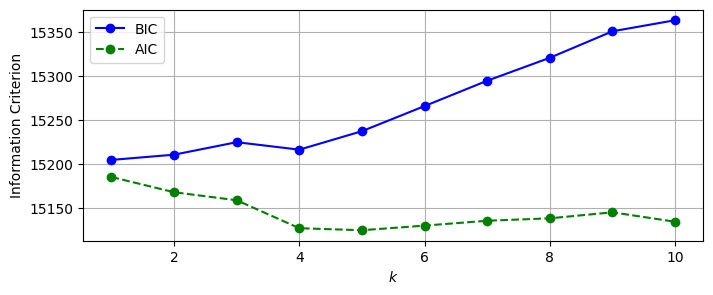

In [ ]:
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X2D)
             for k in range(1, 11)]
bics = [model.bic(X2D) for model in gms_per_k]
aics = [model.aic(X2D) for model in gms_per_k]

plt.figure(figsize=(8, 3))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$")
plt.ylabel("Information Criterion")
plt.legend()
plt.grid()
plt.show()

We have interesting results because 2 criterions have different trends. For BIC the minimum is 3 while for AIC minimum is 5. As said it lecture slides, BIC use simpler model but usually "tend to not fit the data quite as well". So, let me choose 5 clusters.

In [ ]:
gm = GaussianMixture(n_components=5, n_init=10, random_state=42)
gm.fit(X2D)

GaussianMixture(n_components=5, n_init=10, random_state=42)

In [ ]:
y_pred = gm.predict(X2D)

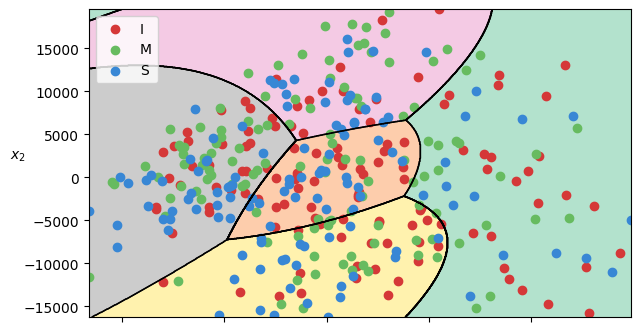

In [ ]:
categories = np.unique(y)
colors = ['#D53838', '#67BB60', '#3887D5']

plt.figure(figsize=(7,4))
plot_decision_boundaries_without_points(gm, X2D, show_centroids=False,
                         show_xlabels=False)

for category, color in zip(categories, colors):
    indices = y == category
    plt.scatter(X2D[indices, 0], X2D[indices, 1], c=color, label=category)

plt.legend()
plt.show()

Again, clustering does not make lot of sense

In [ ]:
gen_reduced, y_gen = gm.sample(n_samples=20)
gen_rocks = pca.inverse_transform(gen_reduced)

In [ ]:
gen_rocks.shape

(20, 160000)

In [ ]:
def plot_rocks(instances, images_per_row=5, **options):
    size = 400
    images_per_row = min(len(instances), images_per_row)
    n_rows = (len(instances) - 1) // images_per_row + 1

    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 200×200 images
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size, images_per_row * size)

    # Now that we have a big image, we just need to show it with the specified colormap:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")
    plt.show()

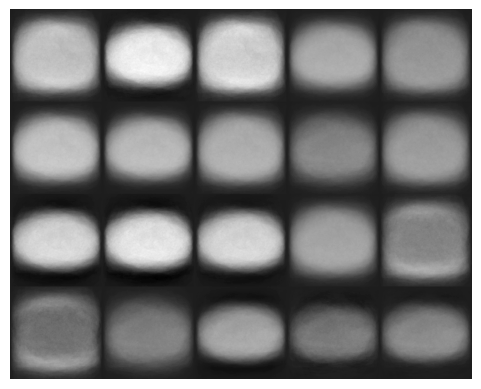

In [ ]:
plot_rocks(gen_rocks)

Mostly we have bad pictures becaue of PCA but we clearly can see different intensity of black and white. To see that let me plot some of true rocks

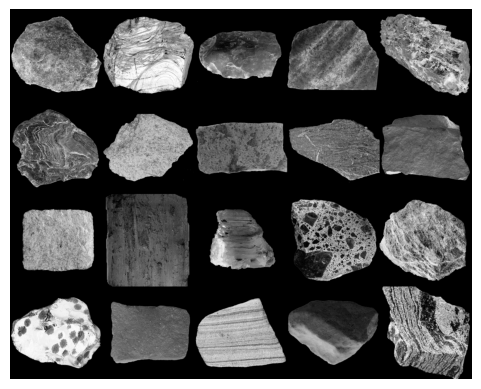

In [ ]:
plot_rocks(rocks_360[:20])

### Fixing input format

In [ ]:
encoder = LabelEncoder()

X_train = np.array(rocks_360)
y_train = encoder.fit_transform([x[0] for x in images_dir])

X_val = np.array(rocks_120)
y_val = encoder.transform([x[0] for x in images_dir2])

# normalize the data
X_train = X_train / 255.0
X_val = X_val / 255.0

### Feedforward Neural Network Structure

In [ ]:
model = keras.Sequential([
    layers.Input(shape = X_train.shape[1:]),
    layers.Reshape((400, 400, 1)),
    layers.Conv2D(filters = 1,
                  kernel_size = (50,50),
                  activation='relu',
                  padding='same',
                  kernel_initializer='he_normal'),
    layers.Flatten(),
    layers.Dense(8,
                 activation = 'relu',
                 kernel_initializer = 'he_normal',
                 name = 'comparison_layer'),
    layers.Dense(3, activation='softmax')
])

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

making an intermediate model for capturing the outputs of 8 neuron layer to compare it to humans

In [ ]:
intermediate_model = keras.Model(inputs = model.input, outputs=model.get_layer('comparison_layer').output)

### Compiling Model

In [ ]:
# Compile the model
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(
    optimizer = optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
start_time = time.time()

history = model.fit(X_train,
                    y_train,
                    epochs = 30,
                    validation_data = (X_val, y_val))

end_time = time.time()
training_time = end_time - start_time

Epoch 1/30
12/12 [==============================] - 4s 232ms/step - loss: 1.0999 - accuracy: 0.3528 - val_loss: 1.0990 - val_accuracy: 0.3833
Epoch 2/30
12/12 [==============================] - 2s 202ms/step - loss: 1.0974 - accuracy: 0.4111 - val_loss: 1.0988 - val_accuracy: 0.4000
Epoch 3/30
12/12 [==============================] - 2s 202ms/step - loss: 1.0930 - accuracy: 0.4139 - val_loss: 1.0981 - val_accuracy: 0.3500
Epoch 4/30
12/12 [==============================] - 3s 217ms/step - loss: 1.0623 - accuracy: 0.4083 - val_loss: 1.1157 - val_accuracy: 0.3583
Epoch 5/30
12/12 [==============================] - 2s 208ms/step - loss: 1.0023 - accuracy: 0.4944 - val_loss: 1.0993 - val_accuracy: 0.4000
Epoch 6/30
12/12 [==============================] - 2s 211ms/step - loss: 0.8893 - accuracy: 0.6139 - val_loss: 1.6106 - val_accuracy: 0.3833
Epoch 7/30
12/12 [==============================] - 3s 210ms/step - loss: 0.7709 - accuracy: 0.7083 - val_loss: 1.1095 - val_accuracy: 0.5333
Epoch 

In [ ]:
print("Time taken to train the model:",training_time)

Time taken to train the model: 84.75254487991333


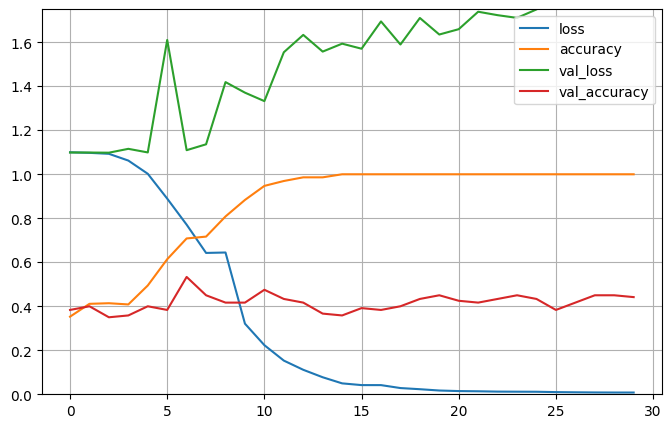

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1.75)
plt.show()

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_12 (Reshape)        (None, 400, 400, 1)       0         
                                                                 
 conv2d_17 (Conv2D)          (None, 400, 400, 1)       2501      
                                                                 
 flatten_11 (Flatten)        (None, 160000)            0         
                                                                 
 comparison_layer (Dense)    (None, 8)                 1280008   
                                                                 
 dense_13 (Dense)            (None, 3)                 27        
                                                                 
Total params: 1282536 (4.89 MB)
Trainable params: 1282536 (4.89 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
comparison_layer_output_train = intermediate_model.predict(X_train)
mtx1_train, mtx2_train, disparity_train = procrustes(mds_360, comparison_layer_output_train)

12/12 [==============================] - 1s 49ms/step


In [ ]:
disparity_train

0.9896860559215723

In [ ]:
correlations = []
for i in range(mtx1_train.shape[1]):
  correlation = np.corrcoef(mtx1_train[:, i], mtx2_train[:, i])[0, 1]
  correlations.append(correlation)

In [ ]:
correlations

[0.09741705896443398,
 0.16176252064689356,
 0.05899489371162656,
 0.1274809097933705,
 0.12678566436050673,
 0.08187264649685544,
 0.0503913952894461,
 0.04240577538404016]

In [ ]:
comparison_layer_output_val = intermediate_model.predict(X_val)
mtx1_val, mtx2_val, disparity_val = procrustes(mds_120, comparison_layer_output_val)

4/4 [==============================] - 0s 73ms/step


In [ ]:
disparity_val

0.9632146796677875

In [ ]:
correlations2 = []
for i in range(mtx1_val.shape[1]):
  correlation = np.corrcoef(mtx1_val[:, i], mtx2_val[:, i])[0, 1]
  correlations2.append(correlation)

In [ ]:
correlations

[0.09741705896443398,
 0.16176252064689356,
 0.05899489371162656,
 0.1274809097933705,
 0.12678566436050673,
 0.08187264649685544,
 0.0503913952894461,
 0.04240577538404016]